* SERIES 200 THUẬT TOÁN AI VÀ DEMO CỦA CHÚNG.

I. Machine Learning Algorithms

4. Random Forest

- Mô tả: Tổ hợp nhiều cây quyết định để tăng độ chính xác.
- Demo: Dự đoán bệnh tiểu đường dựa trên các biến y tế.

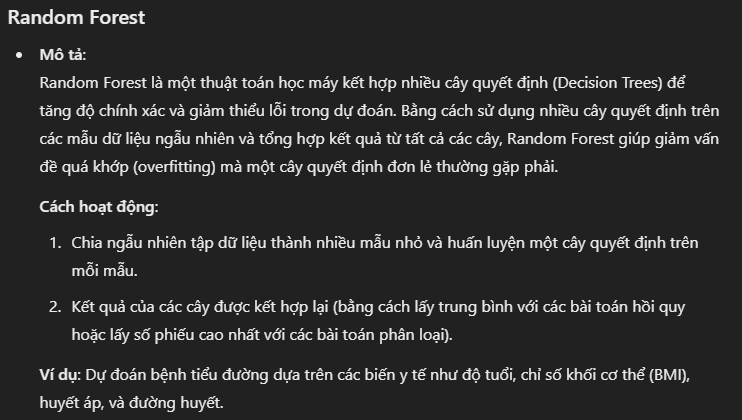

Độ chính xác: 71.91%
Ma trận nhầm lẫn:
 [[37 12]
 [13 27]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        49
           1       0.69      0.68      0.68        40

    accuracy                           0.72        89
   macro avg       0.72      0.72      0.72        89
weighted avg       0.72      0.72      0.72        89



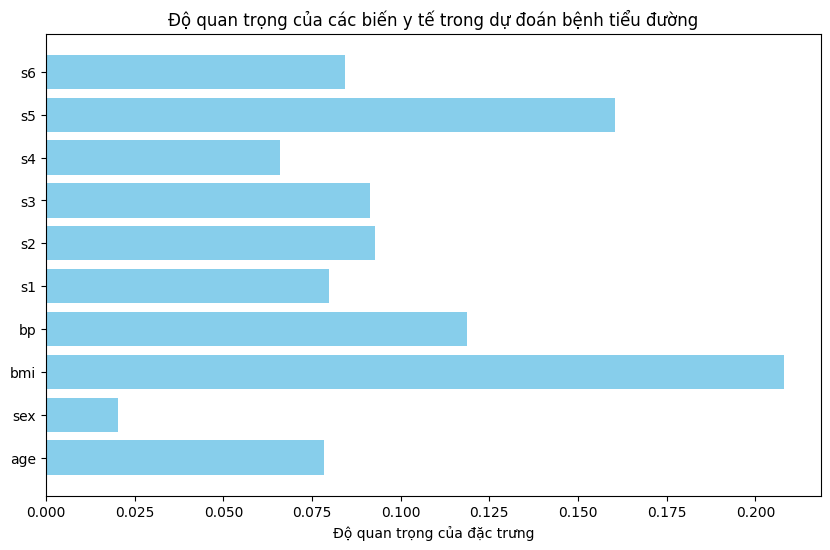

In [1]:
from sklearn.ensemble import RandomForestClassifier # Sử dụng mô hình Random Forest
from sklearn.datasets import load_diabetes # Sử dụng dữ liệu về bệnh tiểu đường
from sklearn.model_selection import train_test_split # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Đánh giá mô hình

# Tải dữ liệu về bệnh tiểu đường
data = load_diabetes() # Dữ liệu là một dictionary gồm các keys: data, target, feature_names, DESCR 
X = data.data  # Các biến y tế (đặc trưng)
y = (data.target > 140).astype(int)  # Mục tiêu: 1 (nguy cơ cao), 0 (nguy cơ thấp)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Chia theo tỉ lệ 80-20

# Tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42) # Số cây quyết định: 100
model.fit(X_train, y_train) # Huấn luyện mô hình

# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)  # Dự đoán nhãn của tập kiểm tra     

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred) # Độ chính xác
conf_matrix = confusion_matrix(y_test, y_pred) # Ma trận nhầm lẫn
class_report = classification_report(y_test, y_pred) # Báo cáo phân loại

# In ra độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
print(f"Độ chính xác: {accuracy * 100:.2f}%") # Độ chính xác
print("Ma trận nhầm lẫn:\n", conf_matrix) # Ma trận nhầm lẫn
print("Báo cáo phân loại:\n", class_report) # Báo cáo phân loại

# Lấy độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_ # Độ quan trọng của các đặc trưng
feature_names = data.feature_names # Tên của các đặc trưng

# Vẽ biểu đồ độ quan trọng của các đặc trưng
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị
plt.figure(figsize=(10, 6)) # Kích thước đồ thị
plt.barh(feature_names, feature_importances, color='skyblue') # Vẽ biểu đồ cột ngang
plt.xlabel('Độ quan trọng của đặc trưng') # Tên trục x 
plt.title('Độ quan trọng của các biến y tế trong dự đoán bệnh tiểu đường') # Tiêu đề
plt.show() # Hiển thị biểu đồ
